In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Analysis_functions import *

In [2]:
# Read the LVM file
data = np.loadtxt('ExpData_SolarCooker_DesignBuild3.lvm', delimiter='\t', skiprows=22)  # Adjust skiprows based on your file's header

# Display the first few rows of the data
print(data[:4])

# Process the data (example: calculate the mean of a column)
mean_value = np.mean(data[:, 1])
print(f'Mean value: {mean_value}')

# Save the processed data to a new text file
# np.savetxt('/path/to/processed_data.txt', data, delimiter='\t')

[[ 0.       22.17564   0.       22.090767  0.       22.170955  0.
  22.104813  0.       23.566219  0.       22.152153  0.       22.179609]
 [ 0.152826 22.206474  0.152826 22.083351  0.152826 22.172355  0.152826
  22.087595  0.152826 23.579745  0.152826 22.154956  0.152826 22.151128]
 [ 0.315763 22.191678  0.315763 22.092538  0.315763 22.14169   0.315763
  22.097178  0.315763 23.582909  0.315763 22.159278  0.315763 22.159733]
 [ 0.465645 22.206009  0.465645 22.080726  0.465645 22.15098   0.465645
  22.116248  0.465645 23.607635  0.465645 22.133249  0.465645 22.207668]]
Mean value: 65.37320481487325


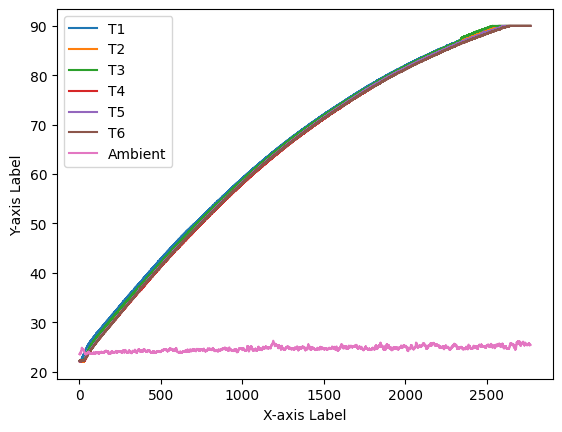

In [3]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(data[:, 0], data[:, 1], label='T1')
plt.plot(data[:, 0], data[:, 3], label='T2')
plt.plot(data[:, 0], data[:, 5], label='T3')
plt.plot(data[:, 0], data[:, 7], label='T4')
plt.plot(data[:, 0], data[:, 11], label='T5')
plt.plot(data[:, 0], data[:, 13], label='T6')
plt.plot(data[:, 0], data[:, 9], label='Ambient')

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.show()

In [4]:
from statsmodels.nonparametric.smoothers_lowess import lowess

window = 100
N = data.shape[0]
print(f'Number of data points: {N}')
frac = window / N  # Equivalent to MATLAB window parameter
print(f'Fraction: {frac}')
# Apply the LOWESS smoothing
smoothed_data = lowess(data[:, 1], data[:, 0], frac=frac)

Number of data points: 18382
Fraction: 0.00544010445000544


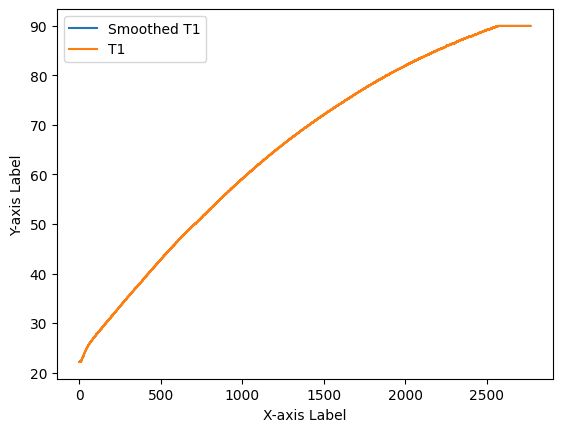

In [5]:
# Plot the smoothed data
plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], label='Smoothed T1')
plt.plot(data[:, 0], data[:, 1], label='T1')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()

# Zoom into a section of the graph
#plt.xlim(400, 500)  # Adjust the range as needed
#plt.ylim(39, 43)  # Adjust the range as needed
plt.show()

In [6]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[:, 0], y=data[:, 1], mode='lines', name='T1'))
fig.add_trace(go.Scatter(x=smoothed_data[:, 0], y=smoothed_data[:, 1], mode='lines', name='Smoothed T1'))
fig.show()

In [7]:
window = 100
N = data.shape[0]
print(f'Number of data points: {N}')
frac = window / N  # Equivalent to MATLAB window parameter
print(f'Fraction: {frac}')
# Apply the LOWESS smoothing
smoothed_data_ambient = lowess(data[:, 9], data[:, 0], frac=frac)

Number of data points: 18382
Fraction: 0.00544010445000544


In [8]:
mass_water = 1000  # g

power_input = power(smoothed_data[:, 0], (smoothed_data[:, 1] - smoothed_data_ambient[:, 1]), mass_water)
power_input

array([-176.09275393, -175.99450522, -175.87928856, ...,   75.91509518,
         75.30255302,   74.69695098], shape=(18381,))

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=(smoothed_data[:, 1] - smoothed_data_ambient[:, 1]), y=power_input, mode='lines', name='T1'))
fig.show()